# 한국 범죄 데이터 분석

- 수정일: 2020년 9월 25일
- 데이터 명: 경찰청_범죄자 생활정도, 혼인관계 및 부모관계

공공데이터포털에서 얻을 수 있다. 정확하게 명시되어 있는 것은 없지만 차기 등록 예정일이 2021년 9월 25일인 것으로 보아 매년 업데이트 되는 것 같다.

따라서 해당 분석에 쓰인 데이터는 2020년 한 해에 있었던 범죄 데이터라고 추측할 수 있다. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rc('font', family='Malgun Gothic') # 한글 폰트 지정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [28]:
df1 = pd.read_csv('pydata/crime_2016.csv', encoding='cp949')
df1.head()

,범죄대분류,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
0,강력범죄,살인기수,236,69,6,78,122,18,59,12,45,0,1,11,0,18,0,0,24,79
1,강력범죄,살인미수등,384,135,5,62,175,27,115,20,105,0,2,7,1,37,0,0,35,62
2,강력범죄,강도,1412,412,20,155,325,38,166,13,843,3,19,101,14,186,3,5,128,155
3,강력범죄,강간,2325,1750,68,1478,964,90,451,43,1845,9,28,162,36,330,3,5,165,1490
4,강력범죄,유사강간,247,178,3,107,96,12,44,3,185,0,5,17,3,36,1,2,25,106


In [29]:
df1.tail()

,범죄대분류,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
33,노동범죄,노동범죄,1482,648,36,229,1439,28,234,30,320,1,3,16,0,71,0,1,22,230
34,안보범죄,안보범죄,70,71,3,30,55,7,10,0,48,0,1,5,0,8,0,0,10,30
35,선거범죄,선거범죄,269,552,92,208,830,23,21,23,7,0,0,0,0,5,0,0,2,210
36,병역범죄,병역범죄,12282,5104,71,784,1997,216,348,18,10880,50,139,1214,91,1740,20,35,707,786
37,기타범죄,기타범죄,108959,70794,3223,58771,96754,3431,20961,4466,41566,209,219,2607,228,7446,52,92,4857,58859


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   범죄대분류            38 non-null     object
 1   범죄중분류            38 non-null     object
 2   생활정도(하류)         38 non-null     int64 
 3   생활정도(중류)         38 non-null     int64 
 4   생활정도(상류)         38 non-null     int64 
 5   생활정도(미상)         38 non-null     int64 
 6   혼인관계(유배우자)       38 non-null     int64 
 7   혼인관계(동거)         38 non-null     int64 
 8   혼인관계(이혼)         38 non-null     int64 
 9   혼인관계(사별)         38 non-null     int64 
 10  미혼자부모관계(실(양)부모)  38 non-null     int64 
 11  미혼자부모관계(계부모)     38 non-null     int64 
 12  미혼자부모관계(실부계모)    38 non-null     int64 
 13  미혼자부모관계(실부무모)    38 non-null     int64 
 14  미혼자부모관계(실모계부)    38 non-null     int64 
 15  미혼자부모관계(실모무부)    38 non-null     int64 
 16  미혼자부모관계(계부무모)    38 non-null     int64 
 17  미혼자부모관계(계모무부)    38 non-null     int6

In [31]:
df1.index

RangeIndex(start=0, stop=38, step=1)

In [32]:
df1.columns

Index(['범죄대분류', '범죄중분류', '생활정도(하류)', '생활정도(중류)', '생활정도(상류)', '생활정도(미상)',
       '혼인관계(유배우자)', '혼인관계(동거)', '혼인관계(이혼)', '혼인관계(사별)', '미혼자부모관계(실(양)부모)',
       '미혼자부모관계(계부모)', '미혼자부모관계(실부계모)', '미혼자부모관계(실부무모)', '미혼자부모관계(실모계부)',
       '미혼자부모관계(실모무부)', '미혼자부모관계(계부무모)', '미혼자부모관계(계모무부)', '미혼자부모관계(무부모)',
       '미상'],
      dtype='object')

### 1. 범죄대분류 최다 빈도수 분석

**주의**

범죄대분류가 큰 분류이고 범죄중분류가 범죄대분류 안에 포함하는 '세부 범죄명'라고 할 수 있다.

범죄중분류의 개수는 범죄대분류가 어떤 범죄인지에 따라 범주 개수가 다르다. 따라서 범죄중분류가 여러 개인 범죄대분류 컬럼은 같은 범죄대분류 값이 여러개가 있다.

여기서 주의해야할 것은 범죄대분류 값의 개수가 많을수록( = 범죄중분류의 값이 많을수록) 해당 범죄가 많이 일어났다는 것이 아니다.

예를 들어 '지능범죄'의 범죄중분류는 8가지로 가장 많은 범죄중분류를 가지고 있다. 하지만 이것이 가장 많이 일어난 범죄 종류를 뜻하는 것은 아니다.

In [33]:
# 범죄대분류 데이터 확인
df1['범죄대분류'].unique()

array(['강력범죄', '절도범죄', '폭력범죄', '지능범죄', '풍속범죄', '특별경제범죄', '마약범죄', '보건범죄',
       '환경범죄', '교통범죄', '노동범죄', '안보범죄', '선거범죄', '병역범죄', '기타범죄'],
      dtype=object)

In [34]:
# 범죄대분류별 범죄중분류 개수
df1.groupby(['범죄대분류']).count()

,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
범죄대분류,,,,,,,,,,,,,,,,,,,
강력범죄,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
교통범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
기타범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
노동범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
마약범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
병역범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
보건범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
선거범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
안보범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


강력범죄, 지능범죄, 폭력범죄, 폭력범죄, 풍속범죄를 제외하면 범죄중분류개수는 1개이다.

#### 범죄대분류별 합계( 그룹화: gorupby() )

- 형식: 데이터 명 **.groupby** ( **' 기준 컬럼 '** ) **.기술통계함수()**

    * 같은 '기준 컬럼'별로 통계량을 출력한다.
    * 기준 컬럼은 인덱스로 지정된다.

In [35]:
# 범죄대분류별로 그룹화
df1_group = df1.groupby('범죄대분류').sum()
df1_group

,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
범죄대분류,,,,,,,,,,,,,,,,,,
강력범죄,12778,8671,367,4005,7324,504,2267,358,7751,33,105,652,96,1586,9,25,1077,4034
교통범죄,235633,149757,3165,160819,238439,4734,24391,4410,93927,550,271,3585,325,11737,97,331,5240,161337
기타범죄,108959,70794,3223,58771,96754,3431,20961,4466,41566,209,219,2607,228,7446,52,92,4857,58859
노동범죄,1482,648,36,229,1439,28,234,30,320,1,3,16,0,71,0,1,22,230
마약범죄,4508,1569,125,711,2328,251,1039,355,1440,12,11,86,19,409,2,7,235,719
병역범죄,12282,5104,71,784,1997,216,348,18,10880,50,139,1214,91,1740,20,35,707,786
보건범죄,9600,6847,1351,2923,11402,334,2477,678,2117,8,14,96,6,396,1,5,264,2923
선거범죄,269,552,92,208,830,23,21,23,7,0,0,0,0,5,0,0,2,210
안보범죄,70,71,3,30,55,7,10,0,48,0,1,5,0,8,0,0,10,30


In [36]:
# 범죄대분류별 합계 및 내림차순

## 범죄대분류별 합계 계산
df1_group = np.sum(df1.groupby('범죄대분류').sum(), axis=1) # axis=1 은 같은 행별로 계산하는 옵션이다.

## 인덱스 재설정
df1_group = pd.DataFrame(df1_group).reset_index()

## 컬럼명 변경
df1_group.rename(columns = {0:'total'}, inplace = True) # inplace = True: 변경 사항을 바로 적용

## 'total' 기준으로 내림차순 정렬
df1_group.sort_values(by='total', ascending=False, inplace = True)

df1_group

,범죄대분류,total
1,교통범죄,1098748
12,폭력범죄,745446
10,지능범죄,588758
2,기타범죄,483494
9,절도범죄,206332
11,특별경제범죄,180712
13,풍속범죄,82166
0,강력범죄,51642
6,보건범죄,41442
5,병역범죄,36482


#### 최다 빈도수의 범죄대분류 리스트 생성

In [37]:
crime_list = df1_group['범죄대분류'].tolist()
crime_list

['교통범죄',
 '폭력범죄',
 '지능범죄',
 '기타범죄',
 '절도범죄',
 '특별경제범죄',
 '풍속범죄',
 '강력범죄',
 '보건범죄',
 '병역범죄',
 '마약범죄',
 '환경범죄',
 '노동범죄',
 '선거범죄',
 '안보범죄']

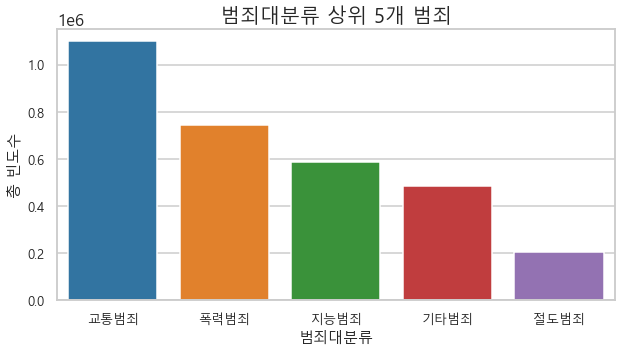

In [38]:
# 막대그래프 시각화
plt.figure(figsize = (10, 5))
plt.rc('font', family='Malgun Gothic') # 한글 폰트 지정(맑은 고딕)
plt.title('범죄대분류 상위 5개 범죄', fontsize=20)

sns.set_style('darkgrid') # 그래프 스타일 지정
sns.barplot(data=df1_group, x= '범죄대분류', y = 'total', order = crime_list[:5])

plt.ylabel('총 빈도수', fontsize = 15)
plt.xlabel('범죄대분류', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

**[결과 해석]**

범죄대분류의 상위 5개 범죄 분석 결과, '교통범죄'가 가장 많은 빈도를 차지하고 있다.

'지능범죄'가 가장 많은 빈도를 차지하고 있다.

그 아래로는 '폭력범죄', '지능범죄', '기타범죄', 그리고 '절도범죄'가 있다.

지능범죄는 사기, 위조, 횡령 따위와 같이 높은 지적 능력을 이용하여 저지르는 범죄를 의미한다.

### 2. '강력범죄' 중 범죄중분류 최다 빈도수 분석

In [39]:
# 조건 설정
cond1 = (df1['범죄대분류'] == '강력범죄')
df2 = df1.loc[cond1].drop(columns = '범죄대분류')
df2

,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
0,살인기수,236,69,6,78,122,18,59,12,45,0,1,11,0,18,0,0,24,79
1,살인미수등,384,135,5,62,175,27,115,20,105,0,2,7,1,37,0,0,35,62
2,강도,1412,412,20,155,325,38,166,13,843,3,19,101,14,186,3,5,128,155
3,강간,2325,1750,68,1478,964,90,451,43,1845,9,28,162,36,330,3,5,165,1490
4,유사강간,247,178,3,107,96,12,44,3,185,0,5,17,3,36,1,2,25,106
5,강제추행,6752,5597,249,1890,5021,223,1148,219,4201,17,35,290,25,843,2,12,549,1903
6,기타 강간 강제추행등,363,208,6,109,120,15,56,10,253,2,9,30,9,48,0,0,24,110
7,방화,1059,322,10,126,501,81,228,38,274,2,6,34,8,88,0,1,127,129


#### 각 행을 합한 값으로 새로운 열 생성

In [40]:
# 범죄중분류별 합계 계산
df2['합계'] = np.sum(df2, axis=1)
df2

,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상,합계
0,살인기수,236,69,6,78,122,18,59,12,45,0,1,11,0,18,0,0,24,79,778
1,살인미수등,384,135,5,62,175,27,115,20,105,0,2,7,1,37,0,0,35,62,1172
2,강도,1412,412,20,155,325,38,166,13,843,3,19,101,14,186,3,5,128,155,3998
3,강간,2325,1750,68,1478,964,90,451,43,1845,9,28,162,36,330,3,5,165,1490,11242
4,유사강간,247,178,3,107,96,12,44,3,185,0,5,17,3,36,1,2,25,106,1070
5,강제추행,6752,5597,249,1890,5021,223,1148,219,4201,17,35,290,25,843,2,12,549,1903,28976
6,기타 강간 강제추행등,363,208,6,109,120,15,56,10,253,2,9,30,9,48,0,0,24,110,1372
7,방화,1059,322,10,126,501,81,228,38,274,2,6,34,8,88,0,1,127,129,3034


In [41]:
# 합계를 기준으로 내림차순
df3 = df2[['범죄중분류','합계']].sort_values(by='합계', ascending = False)
df3

,범죄중분류,합계
5,강제추행,28976
3,강간,11242
2,강도,3998
7,방화,3034
6,기타 강간 강제추행등,1372
1,살인미수등,1172
4,유사강간,1070
0,살인기수,778


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current

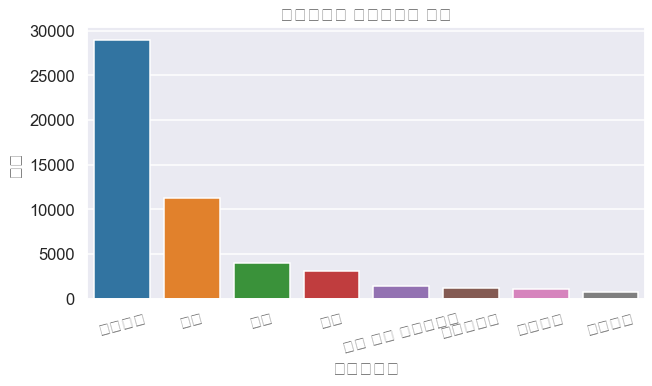

In [42]:
# 막대그래프 시각화(오류 발생)
plt.figure(figsize = (10,5))
plt.xticks(rotation = 15) # x축 레이블 회전
plt.title('강력범죄의 범죄중분류 건수', fontsize = 18)
sns.set_style('whitegrid') # 그래프 스타일 지정
sns.barplot(data=df3, x='범죄중분류', y='합계')
plt.show()

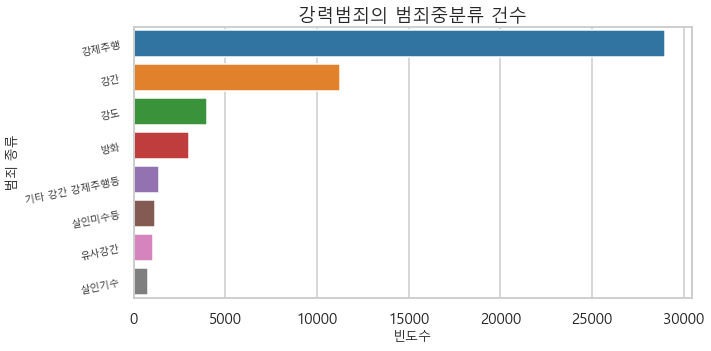

In [43]:
# 막대그래프 시각화
plt.figure(figsize = (10,5))
plt.rc('font', family='Malgun Gothic') # 힌글 폰트 지정(맑은 고딕)
plt.title('강력범죄의 범죄중분류 건수', fontsize = 18)

sns.barplot(data=df3, y='범죄중분류', x='합계')
sns.set_style('whitegrid') # 그래프 스타일 지정
plt.xlabel('빈도수', fontsize = 13) # x축 제목 서식 설정
plt.ylabel('범죄 종류', fontsize = 13) # y축 제목 서식 설정
plt.xticks(fontsize = 15) # x축 레이블 서식 설정
plt.yticks(fontsize = 10, rotation = 12) # y축 레이블 서식 설정

plt.savefig('image/강력범죄의 범죄중분류 건수.png')
plt.show()
## 해당 그래프는 x, y가 반대이므로 x, y값 서식 설정을 반대로 생각해서 지정해야 한다.

**[결과]**

강력범죄에서는 '강제추행'의 빈도가 약 3만 건으로 앞도적으로 많은 것을 알 수 있다.

다음으로는 '강간', '강도', '방화' 순으로 사건이 일어났다.

**[오류]**

**plt.rc('font', family='Malgun Gothic')** 코드를 첫 번째 cell에 적고 시작을 했는데도 오류가 발생했다.

원래는 한 번만 작성해도 인식하고 그 다음 번에 따로 작성하지 않아도 되는 것으로 알고 있는데 위에 처럼 오류가 발생했다.

일단 다시 한 번 작성했더니 오류가 멈추가 정상 출력되었다.

### 3. '폭력범죄' 중 범죄중분류 최다 빈도수 분석

In [44]:
# 조건 설정
cond1 = (df1['범죄대분류'] == '폭력범죄')
df2 = df1.loc[cond1].drop(columns = '범죄대분류')
df2

,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
9,상해,35833,20727,626,4873,27441,1848,6590,1337,13991,105,94,884,92,2778,14,38,1955,4892
10,폭행,60979,35234,1141,94954,48750,4129,10104,1775,22485,145,145,1452,133,4198,18,31,3558,95385
11,체포 감금,432,278,18,498,288,27,127,11,195,0,5,17,1,32,0,0,22,501
12,협박,3494,2272,93,3338,2894,259,940,99,1067,7,9,59,9,275,0,6,224,3349
13,약취 유인,116,42,5,89,56,3,24,3,54,0,2,6,1,5,0,0,10,88
14,폭력행위등,39148,22299,504,11051,22686,1584,4987,714,24159,160,197,1581,196,3512,26,40,2072,11088
15,공갈,1346,698,41,845,601,43,233,28,816,5,11,102,9,132,2,0,102,846
16,손괴,17294,9434,383,4638,12099,905,3424,619,6765,45,40,422,55,1426,6,14,1274,4655


#### 각 행을 합한 값으로 새로운 열 생성

In [45]:
# 범죄중분류별 합계 계산
df2['합계'] = np.sum(df2, axis=1)
df2

,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상,합계
9,상해,35833,20727,626,4873,27441,1848,6590,1337,13991,105,94,884,92,2778,14,38,1955,4892,124118
10,폭행,60979,35234,1141,94954,48750,4129,10104,1775,22485,145,145,1452,133,4198,18,31,3558,95385,384616
11,체포 감금,432,278,18,498,288,27,127,11,195,0,5,17,1,32,0,0,22,501,2452
12,협박,3494,2272,93,3338,2894,259,940,99,1067,7,9,59,9,275,0,6,224,3349,18394
13,약취 유인,116,42,5,89,56,3,24,3,54,0,2,6,1,5,0,0,10,88,504
14,폭력행위등,39148,22299,504,11051,22686,1584,4987,714,24159,160,197,1581,196,3512,26,40,2072,11088,146004
15,공갈,1346,698,41,845,601,43,233,28,816,5,11,102,9,132,2,0,102,846,5860
16,손괴,17294,9434,383,4638,12099,905,3424,619,6765,45,40,422,55,1426,6,14,1274,4655,63498


In [46]:
# 합계를 기준으로 내림차순
df3 = df2[['범죄중분류','합계']].sort_values(by='합계', ascending = False)
df3

,범죄중분류,합계
10,폭행,384616
14,폭력행위등,146004
9,상해,124118
16,손괴,63498
12,협박,18394
15,공갈,5860
11,체포 감금,2452
13,약취 유인,504


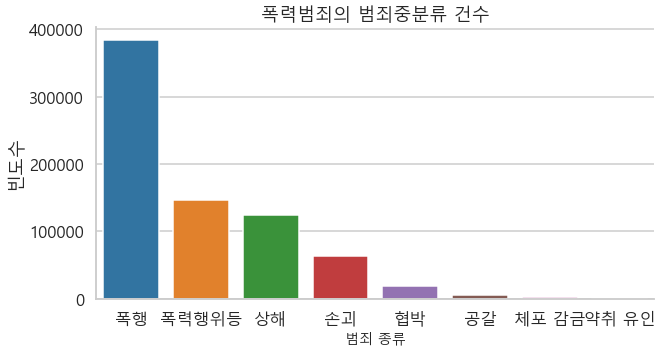

In [51]:
# 막대그래프 시각화
plt.figure(figsize = (10,5))
plt.rc('font', family='Malgun Gothic') # 힌글 폰트 지정(맑은 고딕)
plt.title('폭력범죄의 범죄중분류 건수', fontsize = 18)

sns.set_style('whitegrid') # 그래프 스타일 지정
sns.despine() # 축/테두리 제거
sns.set_context("talk", font_scale=1) # 스케일 크기 조정

sns.barplot(data=df3, x='범죄중분류', y='합계')
plt.xlabel('범죄 종류', fontsize=14)
plt.ylabel('빈도수')

plt.savefig('image/폭력범죄의 범죄중분류 건수.png')
plt.show()

**[결과 해석]**

폭력범죄에서는 '폭행' 사건이 약 270만 건으로 가장 많다. 

그 다음으로는 '폭력행위등', '상해(신체의 생리적 기능에 장해를 일으키는 것)', '손괴(재물 등의 이용가치나 효용을 해하는 행위)' 등이 있다. 

**Despine (축/테두리 제거)**

색상 변경 외에도 spine(축/테두리)을 직접 정의할 수도 있다. spine은 축이라고도 볼 수 있지만, 그림의 경계, 즉 테두리를 의미하기도 한다.

기본값은 네 개의 spine이 모두 있는 거다. **left, right, top, bottom**.

plot을 지정한 후, 그 뒤에 sns.despine()이라고 지정하면 테두리를 제거한다. **아무것도 넣지 않으면 기본적으로 top, right 두 개를 제거**한다.

**set_context**

sns.set_context() 안에 총 4종류의 스케일(사이즈)를 선택할 수 있다. paper, notebook, talk, poster. 여기서 기본값은 notebook이다.

### 4. '지능범죄' 중 범죄중분류 최다 빈도수 분석

In [22]:
# 조건 설정
cond = (df1['범죄대분류'] == '지능범죄')
df2 = df1.loc[cond].drop(columns = '범죄대분류')
df2

,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
17,직무유기,28,136,4,692,157,1,1,0,11,0,0,0,0,0,0,0,1,689
18,직권남용,11,79,1,496,80,1,1,0,8,0,0,0,0,1,0,0,0,496
19,증수뢰,129,429,57,227,527,33,30,9,13,0,0,0,0,1,0,0,1,228
20,통화,81,23,0,182,28,3,5,2,45,1,2,3,0,12,0,0,3,182
21,문서 인장,5840,3848,166,9168,4404,175,1038,391,2904,14,28,230,26,434,8,9,187,9174
22,유가증권인지,105,55,6,233,96,5,26,7,25,0,0,1,1,1,0,0,4,233
23,사기,84091,28513,863,114738,45499,2398,16554,1908,32172,173,383,2967,335,6234,70,109,4404,114999
24,횡령,12564,7018,297,16066,9961,397,2366,440,4765,41,35,399,37,814,5,16,574,16095
25,배임,1225,1566,142,5300,2351,66,221,48,165,0,0,7,0,42,1,1,24,5307


#### 각 행을 합한 값으로 새로운 열 생성

In [23]:
# 범죄중분류별 합계 계산
df2['합계'] = np.sum(df2, axis=1)
df2

,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상,합계
17,직무유기,28,136,4,692,157,1,1,0,11,0,0,0,0,0,0,0,1,689,1720
18,직권남용,11,79,1,496,80,1,1,0,8,0,0,0,0,1,0,0,0,496,1174
19,증수뢰,129,429,57,227,527,33,30,9,13,0,0,0,0,1,0,0,1,228,1684
20,통화,81,23,0,182,28,3,5,2,45,1,2,3,0,12,0,0,3,182,572
21,문서 인장,5840,3848,166,9168,4404,175,1038,391,2904,14,28,230,26,434,8,9,187,9174,38044
22,유가증권인지,105,55,6,233,96,5,26,7,25,0,0,1,1,1,0,0,4,233,798
23,사기,84091,28513,863,114738,45499,2398,16554,1908,32172,173,383,2967,335,6234,70,109,4404,114999,456410
24,횡령,12564,7018,297,16066,9961,397,2366,440,4765,41,35,399,37,814,5,16,574,16095,71890
25,배임,1225,1566,142,5300,2351,66,221,48,165,0,0,7,0,42,1,1,24,5307,16466


In [24]:
# 합계를 기준으로 내림차순
df3 = df2[['범죄중분류', '합계']].sort_values(by='합계', ascending = False)
df3

,범죄중분류,합계
23,사기,456410
24,횡령,71890
21,문서 인장,38044
25,배임,16466
17,직무유기,1720
19,증수뢰,1684
18,직권남용,1174
22,유가증권인지,798
20,통화,572


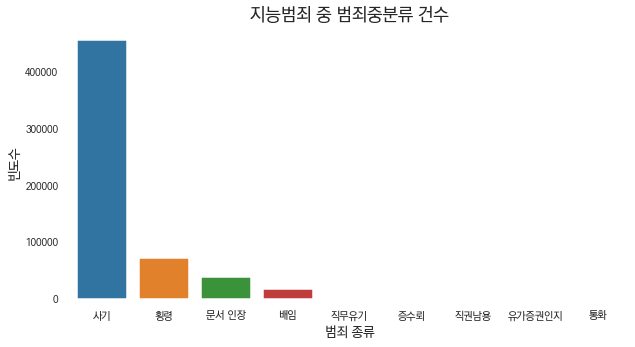

In [25]:
# 막대그래프 시각화
mpl.rc('font', family = 'LG PC') # 한글 폰트 지정(LG PC)
plt.figure(figsize=(10, 5))
plt.title('지능범죄 중 범죄중분류 건수', fontsize = 20)

sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)
sns.barplot(data=df3, x='범죄중분류', y='합계')

plt.xlabel('범죄 종류', fontsize=15)
plt.ylabel('빈도수', fontsize=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

**[결과 해석]**

지능범죄에서는 '사기' 사건이 약 45만 건으로 가장 많다.

그 다음으로는 '횡령', '문서인장', 등이 있다.

### 5. 결혼 여부에 따른 범죄 건수

해당 분석 내용은 한 프레임 안에 두 막대 그래프를 작성하는 법을 몰라서 인터넷 파이썬 분석 블로그를 참고했다.

In [26]:
df1.head()

,범죄대분류,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
0,강력범죄,살인기수,236,69,6,78,122,18,59,12,45,0,1,11,0,18,0,0,24,79
1,강력범죄,살인미수등,384,135,5,62,175,27,115,20,105,0,2,7,1,37,0,0,35,62
2,강력범죄,강도,1412,412,20,155,325,38,166,13,843,3,19,101,14,186,3,5,128,155
3,강력범죄,강간,2325,1750,68,1478,964,90,451,43,1845,9,28,162,36,330,3,5,165,1490
4,강력범죄,유사강간,247,178,3,107,96,12,44,3,185,0,5,17,3,36,1,2,25,106


In [27]:
df1.columns

Index(['범죄대분류', '범죄중분류', '생활정도(하류)', '생활정도(중류)', '생활정도(상류)', '생활정도(미상)',
       '혼인관계(유배우자)', '혼인관계(동거)', '혼인관계(이혼)', '혼인관계(사별)', '미혼자부모관계(실(양)부모)',
       '미혼자부모관계(계부모)', '미혼자부모관계(실부계모)', '미혼자부모관계(실부무모)', '미혼자부모관계(실모계부)',
       '미혼자부모관계(실모무부)', '미혼자부모관계(계부무모)', '미혼자부모관계(계모무부)', '미혼자부모관계(무부모)',
       '미상'],
      dtype='object')

In [28]:
# 혼인 합계, 미혼 합계 컬럼 생성
df1['혼인_합계'] = df1['혼인관계(유배우자)'] + df1['혼인관계(동거)'] + df1['혼인관계(이혼)'] + df1['혼인관계(사별)']

df1['미혼_합계'] = df1['미혼자부모관계(실(양)부모)'] + df1['미혼자부모관계(계부모)'] + df1['미혼자부모관계(실부계모)'] + df1['미혼자부모관계(실부무모)'] + df1['미혼자부모관계(실모계부)'] + df1['미혼자부모관계(실모무부)'] + df1['미혼자부모관계(계부무모)'] + df1['미혼자부모관계(계모무부)'] + df1['미혼자부모관계(무부모)']

In [29]:
df1.head()

,범죄대분류,범죄중분류,생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),혼인관계(사별),...,미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상,혼인_합계,미혼_합계
0,강력범죄,살인기수,236,69,6,78,122,18,59,12,...,1,11,0,18,0,0,24,79,211,99
1,강력범죄,살인미수등,384,135,5,62,175,27,115,20,...,2,7,1,37,0,0,35,62,337,187
2,강력범죄,강도,1412,412,20,155,325,38,166,13,...,19,101,14,186,3,5,128,155,542,1302
3,강력범죄,강간,2325,1750,68,1478,964,90,451,43,...,28,162,36,330,3,5,165,1490,1548,2583
4,강력범죄,유사강간,247,178,3,107,96,12,44,3,...,5,17,3,36,1,2,25,106,155,274


In [30]:
df2 = df1[['범죄중분류', '혼인_합계', '미혼_합계']].set_index('범죄중분류')
df2.sort_values(by='혼인_합계', ascending = False, inplace = True)
df2

,혼인_합계,미혼_합계
범죄중분류,,
교통범죄,271974,116063
기타범죄,125612,57276
사기,66359,46847
폭행,64758,32165
특별경제범죄,37812,23003
절도범죄,37486,57340
상해,37216,19951
폭력행위등,29971,31943
도박범죄,21888,5537


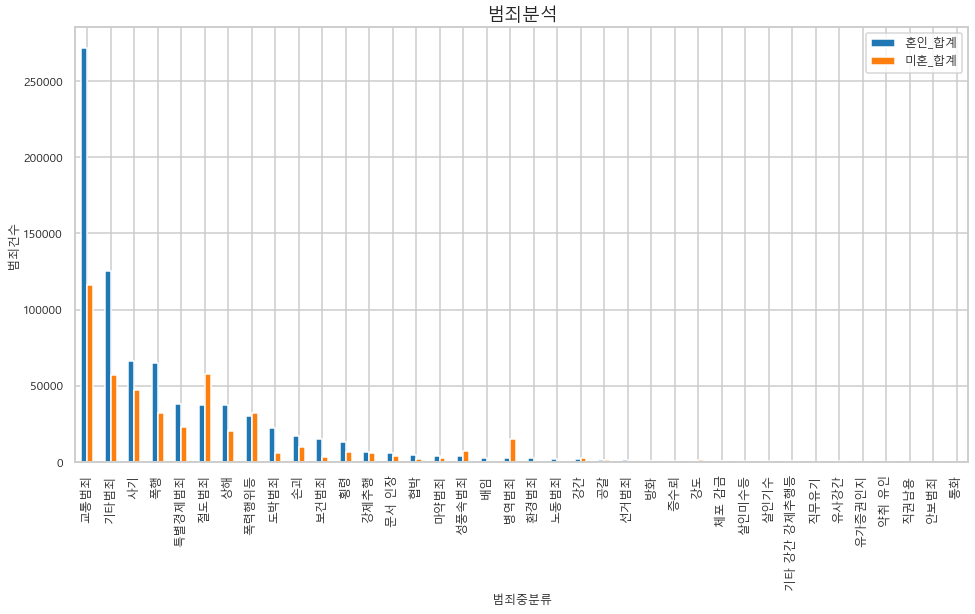

In [32]:
plt.rc('font', family='Malgun Gothic') # 한글 폰트 지정(맑은 고딕)
ax = df2.sort_values(by='혼인_합계', ascending=False).plot(kind='bar', title='범죄분석', figsize=(16, 8), legend=True, fontsize=12) 

ax.set_xlabel('범죄중분류', fontsize=12) # x축 정보 표시 
ax.set_ylabel('범죄건수', fontsize=12) # y축 정보 표시 
ax.legend(['혼인_합계', '미혼_합계'], fontsize=12)

plt.show()